In [110]:
#This program generates FIG. 2D 
#Fig2D: Plot of the number of significant changes in different scenarios with increasing FF input
#Fig Supplementary S2-B: Percentage of positive changes in different scenarios with increasing FF input

In [111]:
#Import some libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

In [102]:
#Importing some info I need 
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

#Print Some information about the mdodel
print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")


The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [112]:
# You select one folder "state" and the correspondant folder with the perturbation data  

#folder_state='../simulations_data/In_with_e4_0pA/i_input4/Sp_1' 
folder_state='../simulations_data/In_with_e4_2pA/i_input4/Sp_1' 
#folder_state='../simulations_data/In_with_e4_5pA/i_input4/Sp_1' 
#folder_state='../simulations_data/In_with_e4_10pA/i_input4/Sp_1' 
#folder_state='../simulations_data/In_with_e4_15pA/i_input4/Sp_1' 
#folder_state='../simulations_data/In_with_e4_20pA/i_input4/Sp_1' 
#folder_state='../simulations_data/In_with_e4_25pA/i_input4/Sp_1' 
#folder_state='../simulations_data/In_with_e4_30pA/i_input4/Sp_1' 
#folder_state='../simulations_data/In_with_e4_35pA/i_input4/Sp_1' 
#folder_state='../simulations_data/In_with_e4_40pA/i_input4/Sp_1'
#folder_state='../simulations_data/In_with_e4_45pA/i_input4/Sp_1'
#folder_state='../simulations_data/In_with_e4_50pA/i_input4/Sp_1'
#folder_state='../simulations_data/In_with_e4_55pA/i_input4/Sp_1'
#folder_state='../simulations_data/In_with_e4_60pA/i_input4/Sp_1'
#folder_state='../simulations_data/In_with_e4_70pA/i_input4/Sp_1'
#folder_state='../simulations_data/In_with_e4_80pA/i_input4/Sp_1'


#folder_input='../simulations_data/In_with_e4_0pA' 
folder_input='../simulations_data/In_with_e4_2pA'
#folder_input='../simulations_data/In_with_e4_5pA' 
#folder_input='../simulations_data/In_with_e4_10pA' 
#folder_input='../simulations_data/In_with_e4_15pA' 
#folder_input='../simulations_data/In_with_e4_20pA' 
#folder_input='../simulations_data/In_with_e4_25pA' 
#folder_input='../simulations_data/In_with_e4_30pA' 
#folder_input='../simulations_data/In_with_e4_35pA' 
#folder_input='../simulations_data/In_with_e4_40pA' 
#folder_input='../simulations_data/In_with_e4_45pA' 
#folder_input='../simulations_data/In_with_e4_50pA' 
#folder_input='../simulations_data/In_with_e4_55pA' 
#folder_input='../simulations_data/In_with_e4_60pA'
#folder_input='../simulations_data/In_with_e4_70pA'
#folder_input='../simulations_data/In_with_e4_80pA'


#This is the threshold to check how much increase I am interested in 
threshold=0.2

In [113]:
#------------------------------------------------------------------------------
# Import the files 
#------------------------------------------------------------------------------

#This funciton takes the name of the folder and import all the spike data 
#The function returns the number of spikes for each group of neurons 

def take_files(a):
    
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [114]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups 
#------------------------------------------------------------------------------

#Funciton to compute the mean firing rates for all the neuron groups given the number spikes 
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    tot_sp_vip1 =  S_vip1num_spikes  #Layer 2/3
    rate_vip1= tot_sp_vip1/(N1*runtime)

    print("runtime: %s" %runtime)
    tot_sp_e23 =  S_e23num_spikes  #Layer 2/3
    #print(tot_sp_e23)
    #print(tot_sp_e23)
    #print(N[0][0])
    # Total number of spikes and rate for each group:
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)
    #print(tot_sp_vip23)

    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)

    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)


    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6


In [115]:
# Import the files in which no perturbation input is given 
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0=take_files(folder_state)

#Compute the rates

rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0=compute_FR(N,N1,runtime,
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,
S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,
S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,
S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.864583
rate_e23: 0.290453 rate_pv23: 3.087179 rate_sst23: 3.602837 rate_vip23: 7.931464
rate_e4: 1.360066 rate_pv4: 3.782313 rate_sst4: 1.654088 rate_vip4: 1.037037
rate_e5: 2.279352 rate_pv5: 4.751323 rate_sst5: 3.821429 rate_vip5: 6.757576
rate_e6: 0.990235 rate_pv6: 4.977124 rate_sst6: 6.336601 rate_vip6: 2.421053


In [107]:
#I create the matrix that will contain the firing rate of each population in that particular simulation
#The input is given to one different population for every simulation.

Matrix_all=[] #create empty array

for i in ['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10','i11','i12','i13','i14','i15','i16']:
    
    #i1 contains the data of the simualtion with perturbative input to first population (E2/3)
    #i2 (input to PV2/3), etc. 
    #I have 16 simulations: input to one population in each simualtion (16 populations in total)
    
    #Import the data of one simulation 'i'
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_input+'/'+i+'/Sp_1')

    #compute the rates 
    rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
    S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
    S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
    S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)


    #PERCENTAGE CHANGE of the firing rate of EACH population (I compare to the value before the input)
    dif_e23=(rate_e23_1 - rate_e23_0)/ rate_e23_0
    dif_pv23=(rate_pv23_1 - rate_pv23_0) / rate_pv23_0
    dif_sst23=(rate_sst23_1 - rate_sst23_0) / rate_sst23_0
    dif_vip23= (rate_vip23_1 - rate_vip23_0)/rate_vip23_0
    dif_e4=(rate_e4_1 - rate_e4_0 )/rate_e4_0
    dif_pv4=(rate_pv4_1 - rate_pv4_0) /rate_pv4_0
    dif_sst4=(rate_sst4_1 - rate_sst4_0) /rate_sst4_0
    dif_vip4=(rate_vip4_1 - rate_vip4_0) /rate_vip4_0
    dif_e5=(rate_e5_1 - rate_e5_0) /rate_e5_0
    dif_pv5=(rate_pv5_1 - rate_pv5_0) /rate_pv5_0
    dif_sst5=(rate_sst5_1 - rate_sst5_0) /rate_sst5_0
    dif_vip5=(rate_vip5_1 - rate_vip5_0) /rate_vip5_0
    dif_e6=(rate_e6_1 - rate_e6_0) /rate_e6_0
    dif_pv6=(rate_pv6_1 - rate_pv6_0) /rate_pv6_0
    dif_sst6=(rate_sst6_1 - rate_sst6_0) /rate_sst6_0
    dif_vip6=(rate_vip6_1 - rate_vip6_0) /rate_vip6_0
    

    #I create the first row of the matrix containing all the rates
    dif_row=[dif_e23,dif_pv23,dif_sst23,dif_vip23,
            dif_e4,dif_pv4,dif_sst4,dif_vip4,
             dif_e5,dif_pv5,dif_sst5,dif_vip5,
             dif_e6,dif_pv6,dif_sst6,dif_vip6]
    
    Matrix_all.append(dif_row) #Fill the matrix with the data you computed

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 1.000000
rate_e23: 6.759709 rate_pv23: 5.717949 rate_sst23: 7.510638 rate_vip23: 16.629283
rate_e4: 1.321782 rate_pv4: 8.676871 rate_sst4: 2.415094 rate_vip4: 5.703704
rate_e5: 3.490778 rate_pv5: 8.402116 rate_sst5: 6.464286 rate_vip5: 6.030303
rate_e6: 0.819214 rate_pv6: 5.941176 rate_sst6: 6.460784 rate_vip6: 2.912281
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.763889
rate_e23: 0.147789 rate_pv23: 10.574359 rate_sst23: 2.964539 rate_vip23: 7.003115
rate_e4: 1.131353 rate_pv4: 3.227891 rate_sst4: 1.490566 rate_vip4: 0.753086
rate_e5: 2.159694 rate_pv5: 3.746032 rate_sst5: 3.690476 rate_vip5: 6.666667
rate_e6: 0.969913 rate_pv6: 4.820261 rate_sst6: 6.388889 rate_vip6: 2.508772
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.559028
rate_e23: 0.140507 rate_pv23:

In [116]:
#Save the matrix in one file
filename_matrix = folder_input.replace('../simulations_data/', '').replace('/', '') +'.txt'
print(filename_matrix)

f=open('../simulations_data/matrix/'+filename_matrix,'w+') #create the file to write the values of the matrix
for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %Matrix_all[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

In_with_e4_2pA.txt


In [117]:
#I import the matrix I just created
m_import=np.loadtxt('../simulations_data/matrix/'+filename_matrix)
#print(m_import)

In [118]:
#Plot of the matrix
#Percentage change of the firing rate of each population as effect of the perturbation input to one population ("source population").

# fig = plt.figure(figsize=(8, 6)) #create the figure
# x_axis_labels = ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
# y_axis_labels = ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
# mA_plot = sns.heatmap(np.array(m_import),square=True,cmap='Reds',xticklabels=x_axis_labels, yticklabels=y_axis_labels) # plot GH with heatmap
# #norm=LogNorm()
# mA_plot.set_xlabel('Effect on', fontsize=15)
# mA_plot.set_ylabel('Input to', fontsize=15)
# plt.title('Matrix state',fontsize=18)
# plt.show(mA_plot)

In [119]:
#I WANT A MATRIX with:
#1 if the fr is increased (by more than threshold%)
#-1 if the fr is decreased (by more than threshold%)
#0 if is the same (less/more by less than threshold%)
sign_matrix= [[0 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 

for h in range(0,16):
    for k in range(0,16):
        if m_import[h][k]>0 and m_import[h][k]>threshold :
            sign_matrix[h][k]=1
        elif abs(m_import[h][k])<threshold :
            sign_matrix[h][k]=0
        elif m_import[h][k]<0 and abs(m_import[h][k])>threshold :
            sign_matrix[h][k]=-1
#print(sign_matrix)     


In [123]:
#Save the sign matrix in one file
#create a name for the file containing the matrix
filename_matrix_sign=str(threshold)+'_sign_'+filename_matrix
#print(filename_matrix_sign)

#Save the matrix
f=open('../simulations_data/matrix/'+filename_matrix_sign,'w+') #create the file to write the values of the sign matrix
for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %sign_matrix[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

In [124]:
#I import the matrix I just created
sign_matrix=np.loadtxt('../simulations_data/matrix/'+filename_matrix_sign)

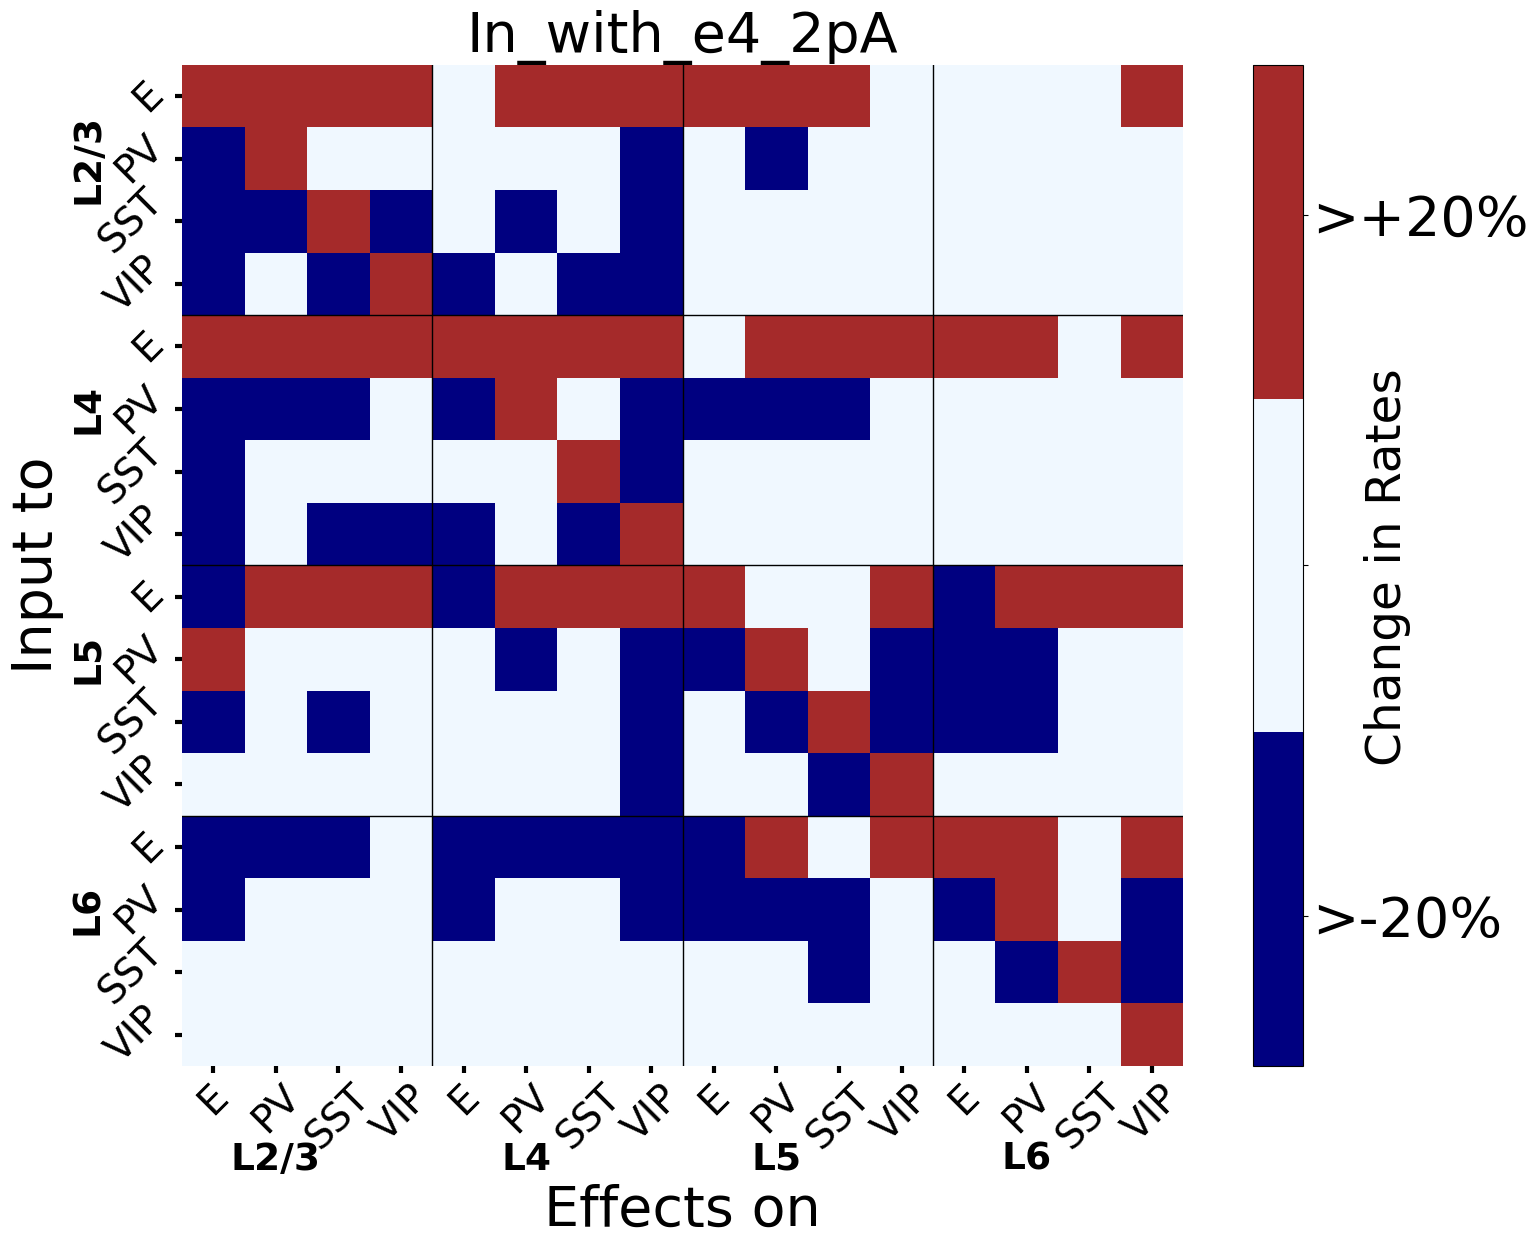

In [125]:
fig = plt.figure(figsize=(18, 13)) #create the figure

#Labels for the axes
x_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP'] # labels for x-axis
y_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']


colors = ["navy", "aliceblue",'brown' ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix),square=True,cmap=col_map,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=0.) # plot GH with heatmap
#Layout
mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels(mA_plot.get_xmajorticklabels(), fontsize = 28,rotation=45)
mA_plot.set_yticklabels(mA_plot.get_ymajorticklabels(), fontsize = 28,rotation=45)

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=27, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.5, pos, label, ha='center', va='center', fontsize=27, fontweight='bold', rotation=90)

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['>-20%', '', '>+20%'])
# colorbar.set_ticklabels(['>-10%', '0', '>10%'])
# colorbar.set_ticklabels(['>-30%', '0', '>30%'])
# colorbar.set_ticklabels(['>-50%', '0', '>50%'])

cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(2.7, -0.4, 'Change in Rates', rotation=90, va='bottom', ha='center', fontsize=35)
cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=40)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=40, labelpad=20)
mA_plot.set_ylabel('Input to', fontsize=40, labelpad=20)
figure_name=filename_matrix.replace('.txt', '')
plt.title(figure_name,fontsize=40)

#Save fig
plt.savefig('../IMAGES/'+figure_name+'.png', bbox_inches='tight')
plt.show(mA_plot)

In [126]:
#COMPUTE THE NUMBER OF SIGNIFICANT CHANGES in each scenario

In [127]:
#function to compute the number of values in the matrix that denote a significant change in firing rates
def count_entry(matrix):
    count=0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != 0 :
                count+=1
    #print(count)
    return count

In [95]:
#Number of counts for each matrix (I call the function I just created)
#I upload each matrix and compute the number of significant changes
count_0pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_0pA.txt'))
count_2pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_2pA.txt'))
count_5pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_5pA.txt'))
count_10pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_10pA.txt'))
count_15pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_15pA.txt'))
count_20pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_20pA.txt'))
count_25pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_25pA.txt'))
count_30pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_30pA.txt'))
count_35pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_35pA.txt'))
count_40pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_40pA.txt'))
count_45pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_45pA.txt'))
count_50pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_50pA.txt'))
count_55pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_55pA.txt'))
count_60pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_60pA.txt'))
count_70pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_70pA.txt'))
count_80pA= count_entry(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_80pA.txt'))

#I create an array with these values 
FF_input=[0,5,10,15,20,25,30,35,40,45,50,55,60,70,80]
counts=[count_0pA,count_5pA,count_10pA,count_15pA,count_20pA,count_25pA,count_30pA,count_35pA,count_40pA,count_45pA,
        count_50pA,count_55pA,count_60pA,count_70pA,count_80pA]

In [ ]:
#Fig. 2D
#Number of significant counts for each matrix.
#Increase the strenght of FF input for each analyzed situation

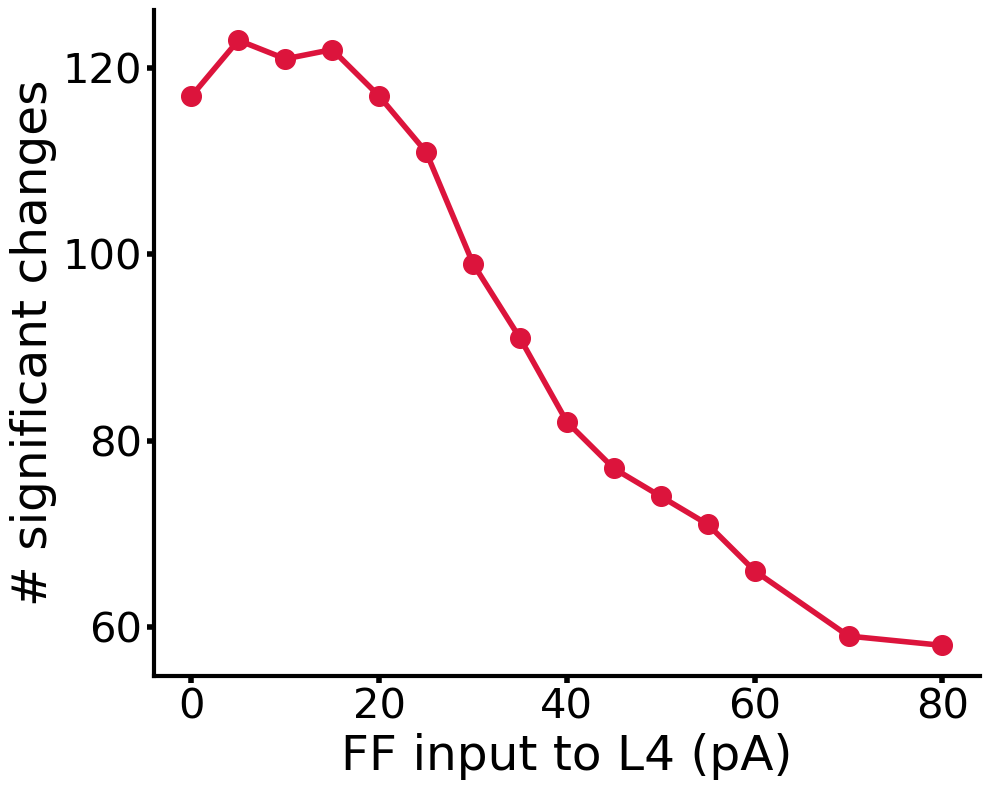

In [96]:
#Create figure
fig , ax = plt.subplots(figsize=(10,8))

#Plot the data
plt.scatter(FF_input,counts, s=200,color='crimson')
plt.plot(FF_input,counts,linewidth=4,  label='E2/3',color='crimson')

# Create names on the x-axis
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
#Layout
plt.xticks(size=30)
plt.yticks(size=30)
ax.xaxis.set_tick_params(width=4,length=5)
ax.yaxis.set_tick_params(width=4,length=5)
#Labels
plt.xlabel('FF input to L4 (pA)',size=35)
plt.ylabel('# significant changes',size=35)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=4)
plt.tight_layout()

#Save fig
plt.savefig('../IMAGES/fig2_FF_number_changes.png')

plt.show()

In [ ]:
#Here I create the supplementary figure S2-B

In [97]:
#function to compute the number of values in the matrix that denote a positive change in firing rates
def count_positive(matrix):
    count=0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] ==1  :
                count+=1
    #print(count)
    return count

In [98]:
#Number of poisitve counts for each matrix (I call the function I just created)
#I am uploading all the matrices and computing it
p_count_0pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_0pA.txt'))
p_count_2pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_2pA.txt'))
p_count_5pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_5pA.txt'))
p_count_10pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_10pA.txt'))
p_count_15pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_15pA.txt'))
p_count_20pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_20pA.txt'))
p_count_25pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_25pA.txt'))
p_count_30pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_30pA.txt'))
p_count_35pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_35pA.txt'))
p_count_40pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_40pA.txt'))
p_count_45pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_45pA.txt'))
p_count_50pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_50pA.txt'))
p_count_55pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_55pA.txt'))
p_count_60pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_60pA.txt'))
p_count_70pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_70pA.txt'))
p_count_80pA= count_positive(np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4_80pA.txt'))

#I create an array with these values 
p_FF_input=[0,5,10,15,20,25,30,35,40,45,50,55,60,70,80]
p_counts=[p_count_0pA,p_count_5pA,p_count_10pA,p_count_15pA,p_count_20pA,p_count_25pA,p_count_30pA,p_count_35pA,p_count_40pA,p_count_45pA,
       p_count_50pA,p_count_55pA,p_count_60pA,p_count_70pA,p_count_80pA]

#I compute the percentage of positive counts over the total counts of significant changes
counts_perc= [(a / b)*100 for a, b in zip(p_counts, counts)]
#print(counts_perc)


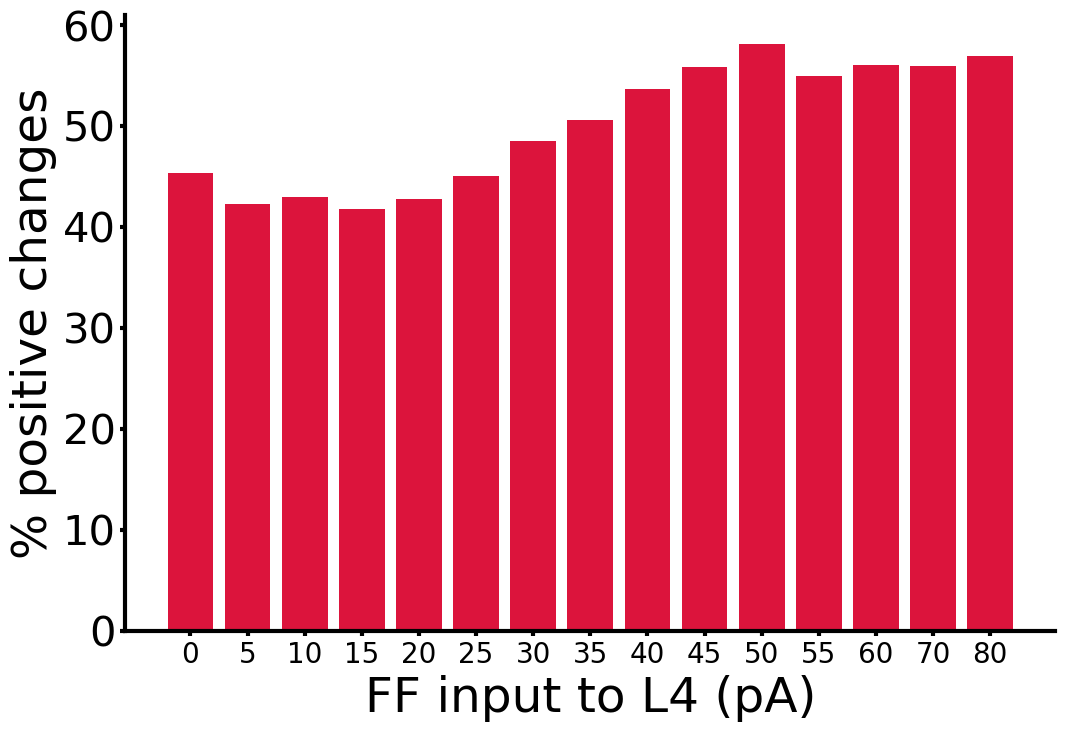

In [99]:
#Create the plot
fig , ax = plt.subplots(figsize=(12,8))
#Labels
labels_all = ('0','5','10','15','20','25','30','35','40','45','50','55','60','70','80')
x_pos = np.arange(len(labels_all))

#plot the data
plt.bar(x_pos,counts_perc, color='crimson',alpha=1)
#plt.bar(x_pos,p_counts) #If I want the number of positive counts

#layout
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
plt.xticks(x_pos, labels_all,size=20)
plt.tick_params(axis='y', labelsize=30)

#labels of the axes
plt.ylabel('% positive changes', size=35) #out of the number of changes 
#plt.ylabel('# positive changes', size=25) #number of changes 
plt.xlabel('FF input to L4 (pA)', size=35) 

#Save fig
plt.savefig('../IMAGES/figS2_PERCpositiveChangeFFvarying.png', bbox_inches='tight')

plt.show()